# Preliminary analysis of supermarket data

In [289]:
import pandas as pd
import numpy as np

from datetime import timedelta

from matplotlib import pyplot as plt

import seaborn as sns

In [4]:
data = pd.read_csv('supermarket_data/monday.csv', sep = ';')

In [26]:
data.head(20)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


In [29]:
data.groupby(['customer_no', 'timestamp']).head(10)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [16]:
data['customer_no'].unique()

array([   1,    2,    3, ..., 1445, 1446, 1447])

## Total number of customers in each section

In [243]:
# reset index so timestamp is index.

dat2 = data.copy()
dat2.index = pd.DatetimeIndex(dat2['timestamp'])

In [244]:
dat2.head()

,timestamp,customer_no,location,hour
timestamp,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7


In [254]:
dat2 = dat2.drop(['timestamp'], axis = 1)

In [255]:
locations = np.array(dat2.groupby('location')['customer_no'].unique())

In [256]:
type(locations)

numpy.ndarray

In [257]:
locations.shape

(5,)

In [258]:
num_customers = [np.count_nonzero(arr) for arr in locations]

In [259]:
num_customers2 = dat2.groupby('location').nunique()
num_customers2

,customer_no,location,hour
location,,,
checkout,1437,1,15
dairy,720,1,15
drinks,661,1,15
fruit,827,1,15
spices,584,1,15


## Number of customers in each section over time

Grouping over hours.

In [260]:
data['hour'] = pd.to_datetime(data['timestamp']).dt.hour

In [261]:
num_cust_time = data.groupby(['location', 'hour']).nunique()
num_cust_time

timestamp  customer_no  location  hour
location hour                                        
checkout 7            50           92         1     1
         8            52          112         1     1
         9            43           85         1     1
         10           46           90         1     1
         11           36           55         1     1
...                  ...          ...       ...   ...
spices   17           31           39         1     1
         18           41           61         1     1
         19           38           50         1     1
         20           35           39         1     1
         21           15           18         1     1

[75 rows x 4 columns]

### check if there is a location recorded for every customer at every time

In [302]:
cust_7 = data[data.customer_no == 7]
cust_7

,timestamp,customer_no,location,hour
6,2019-09-02 07:04:00,7,spices,7
11,2019-09-02 07:05:00,7,drinks,7
28,2019-09-02 07:09:00,7,spices,7
32,2019-09-02 07:11:00,7,fruit,7
40,2019-09-02 07:13:00,7,checkout,7


## fill missing values

In [269]:
customer_list = list(data['customer_no'].unique())

In [270]:
len(customer_list)

1447

In [266]:
dat2[dat2['customer_no'] == 7].resample('T').ffill()

,customer_no,location,hour
timestamp,,,
2019-09-02 07:04:00,7,spices,7
2019-09-02 07:05:00,7,drinks,7
2019-09-02 07:06:00,7,drinks,7
2019-09-02 07:07:00,7,drinks,7
2019-09-02 07:08:00,7,drinks,7
2019-09-02 07:09:00,7,spices,7
2019-09-02 07:10:00,7,spices,7
2019-09-02 07:11:00,7,fruit,7
2019-09-02 07:12:00,7,fruit,7


In [304]:
print(customer_list[6])

7


In [265]:
filled_data = []

In [306]:
#for customer in customer_list[6]:
    tmp_check = dat2[dat2['customer_no'] == customer]
    tmp_check = tmp_check.reset_index()
    deltas = tmp_check['timestamp'].diff()
    gaps = deltas[deltas > timedelta(days=1)]
    for i, g in gaps.iteritems():
        print(i)
        print(g)
        print(gaps.shape)

#    tmp = dat2[dat2['customer_no'] == customer].resample('T').ffill()
#    filled_data = filled_data.join(tmp)

TypeError: 'int' object is not iterable

## Display no. customers at checkout over time

Note: this doesn't yet take into account the customers who were rushed through checkout and whose time there wasn't recorded

In [175]:
checkout = data[data.location == 'checkout']

In [176]:
checkout.head()

,timestamp,customer_no,location,hour
8,2019-09-02 07:05:00,1,checkout,7
9,2019-09-02 07:05:00,5,checkout,7
12,2019-09-02 07:06:00,2,checkout,7
13,2019-09-02 07:06:00,3,checkout,7
20,2019-09-02 07:07:00,8,checkout,7


In [179]:
checkout2 = checkout.groupby('hour').nunique()
checkout2

,timestamp,customer_no,location,hour
hour,,,,
7,50,92,1,1
8,52,112,1,1
9,43,85,1,1
10,46,90,1,1
11,36,55,1,1
12,44,73,1,1
13,54,120,1,1
14,46,90,1,1
15,47,94,1,1


In [180]:
checkout_final = checkout2.drop(['timestamp', 'location', 'hour'], axis = 1)

In [181]:
checkout_final.head()

,customer_no
hour,
7,92
8,112
9,85
10,90
11,55


In [193]:
checkout_final = checkout_final.reset_index()

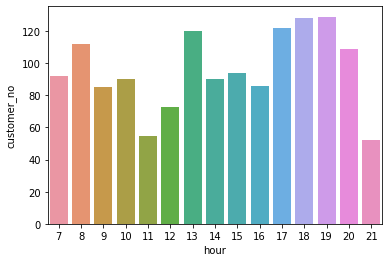

In [201]:
sns.barplot(checkout_final['hour'], checkout_final['customer_no'])

## Calculate how much time each customer spent in the supermarket

- For each customer, find max and min timestamp; subtract

In [202]:
max_times = data.groupby(['customer_no'])['timestamp'].max()

In [203]:
max_times

customer_no
1       2019-09-02 07:05:00
2       2019-09-02 07:06:00
3       2019-09-02 07:06:00
4       2019-09-02 07:08:00
5       2019-09-02 07:05:00
               ...         
1443    2019-09-02 21:48:00
1444    2019-09-02 21:49:00
1445    2019-09-02 21:49:00
1446    2019-09-02 21:50:00
1447    2019-09-02 21:50:00
Name: timestamp, Length: 1447, dtype: object

In [210]:
# double check that this captures all data points from a single customer
checking_cust_2 = data[data.customer_no == 2]

In [211]:
checking_cust_2

,timestamp,customer_no,location,hour
1,2019-09-02 07:03:00,2,dairy,7
12,2019-09-02 07:06:00,2,checkout,7


In [212]:
min_times = data.groupby(['customer_no'])['timestamp'].min()

In [216]:
times = pd.concat([max_times, min_times], axis = 1)

In [218]:
times.columns = ['max_time', 'min_time']

In [219]:
times.head()

,max_time,min_time
customer_no,,
1,2019-09-02 07:05:00,2019-09-02 07:03:00
2,2019-09-02 07:06:00,2019-09-02 07:03:00
3,2019-09-02 07:06:00,2019-09-02 07:04:00
4,2019-09-02 07:08:00,2019-09-02 07:04:00
5,2019-09-02 07:05:00,2019-09-02 07:04:00


In [224]:
times = times.apply(pd.to_datetime, axis = 1)

In [225]:
times['time_spent'] = times['max_time'] - times['min_time']

In [226]:
times.head()

,max_time,min_time,time_spent
customer_no,,,
1,2019-09-02 07:05:00,2019-09-02 07:03:00,00:02:00
2,2019-09-02 07:06:00,2019-09-02 07:03:00,00:03:00
3,2019-09-02 07:06:00,2019-09-02 07:04:00,00:02:00
4,2019-09-02 07:08:00,2019-09-02 07:04:00,00:04:00
5,2019-09-02 07:05:00,2019-09-02 07:04:00,00:01:00
